# Random Forest

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [9]:
# Configure visualizations and suppress warnings
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.dpi'] = 100
sns.set_theme(style='darkgrid', palette='rainbow')
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Load the Glass dataset
df = pd.read_excel("https://raw.githubusercontent.com/snehuuu28/Excelr_Data_Science/main/Assignments/Assignment_14/glass.xlsx", sheet_name=1)

# --- 1. Exploratory Data Analysis (EDA): ---

In [12]:
# Display the first few rows of the dataset
print("Dataset Head:\n", df.head())

Dataset Head:
         RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


In [13]:
# Check the shape of the dataset
print("\nDataset Shape:", df.shape)


Dataset Shape: (214, 10)


In [14]:
# Check for missing values in the dataset
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [15]:
# Display dataset information
print("\nDataset Info:\n")
df.info()


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [16]:
# Show descriptive statistics for numerical columns
print("\nDescriptive Statistics:\n", df.describe())


Descriptive Statistics:
                RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000   

# --- Step 2: Data Visualization ---

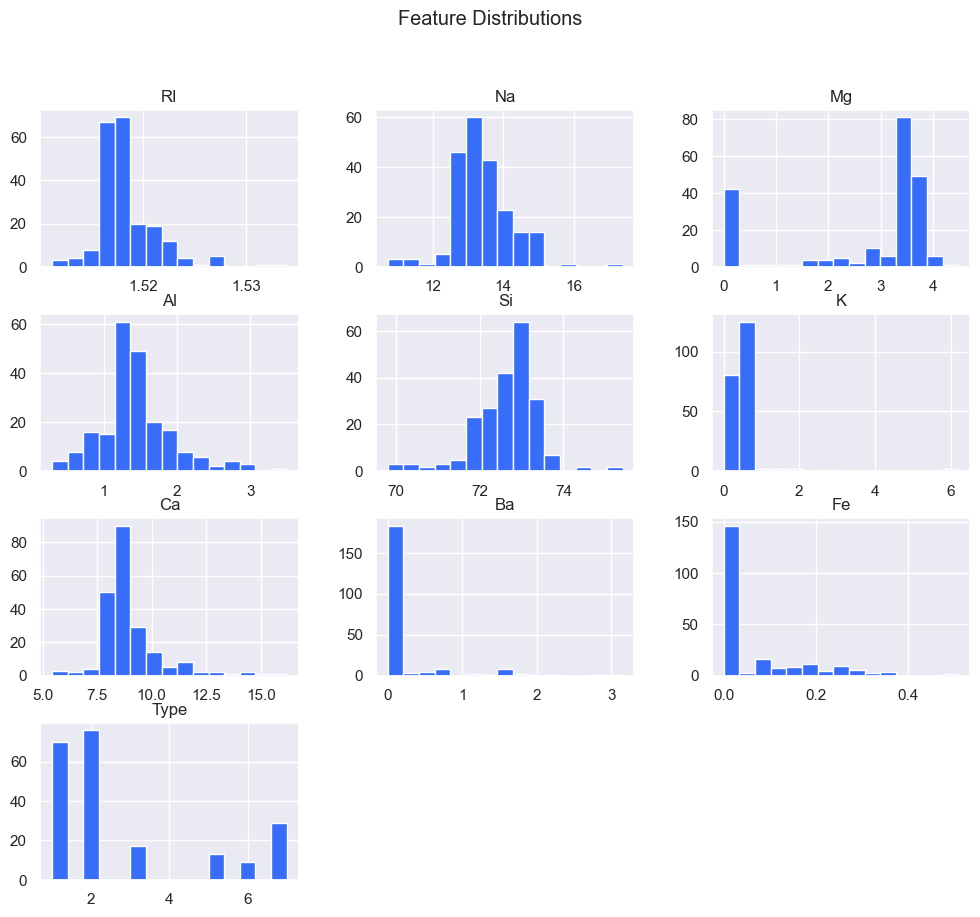

In [18]:
# Plot histograms for all features to visualize distributions
df.hist(bins=15, figsize=(12, 10))
plt.suptitle("Feature Distributions")
plt.show()


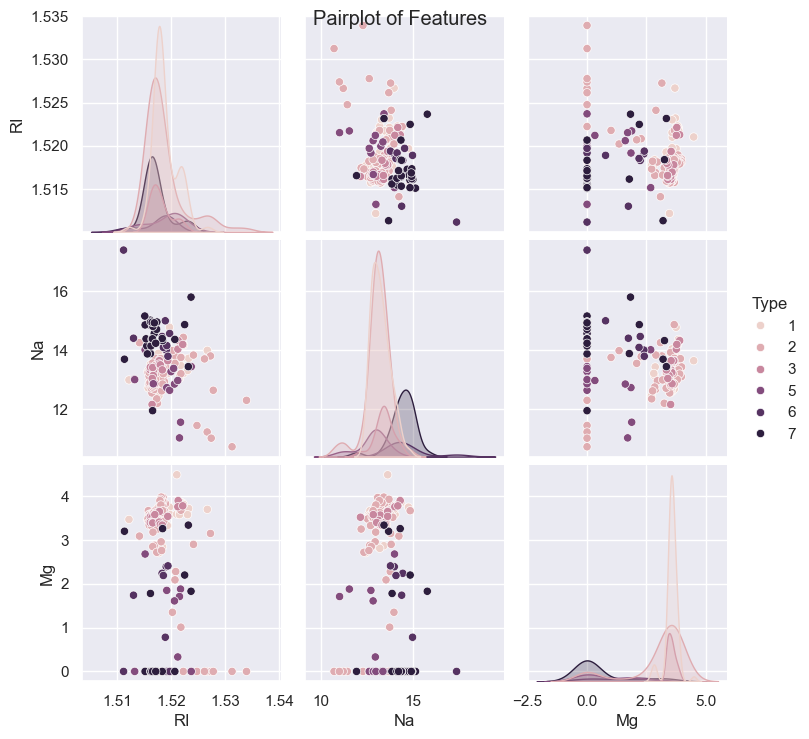

In [19]:
# Pairplot to visualize pairwise relationships between selected features
selected_columns = ['RI', 'Na', 'Mg', 'Type']  # Choose relevant features
sns.pairplot(df[selected_columns], hue='Type')
plt.suptitle("Pairplot of Features")
plt.show()

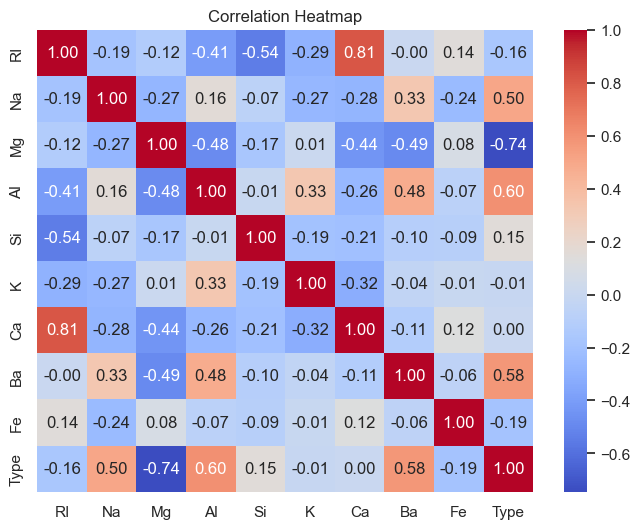

In [20]:
# Correlation heatmap to understand relationships between features
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


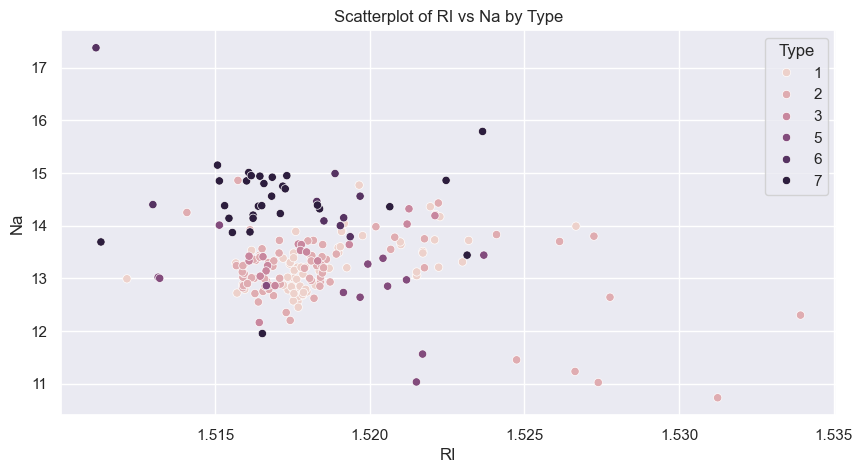

In [21]:
# Scatter plot between two selected features for further insights
sns.scatterplot(data=df, x='RI', y='Na', hue='Type')
plt.title("Scatterplot of RI vs Na by Type")
plt.show()

# --- Step 3: Data Preprocessing ---

In [23]:
# Separate features (X) and target variable (y)
X = df.iloc[:, :-1]  # All columns except the last one
y = df['Type']       # Target column

In [24]:
# Apply feature scaling to standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
# Handle data imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)


In [26]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# --- Step 4: Random Forest Model Implementation ---

In [28]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

In [29]:
# Train the model on the training set
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

In [31]:
# Evaluate the Random Forest model
print("\nRandom Forest Classifier Performance:")
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")


Random Forest Classifier Performance:
Classification Report:
               precision    recall  f1-score   support

           1       0.87      0.76      0.81        17
           2       0.85      0.89      0.87        19
           3       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      0.94      0.97        18

    accuracy                           0.92        92
   macro avg       0.93      0.93      0.93        92
weighted avg       0.93      0.92      0.92        92

Accuracy: 0.9239
Precision: 0.9263
Recall: 0.9239
F1-Score: 0.9234


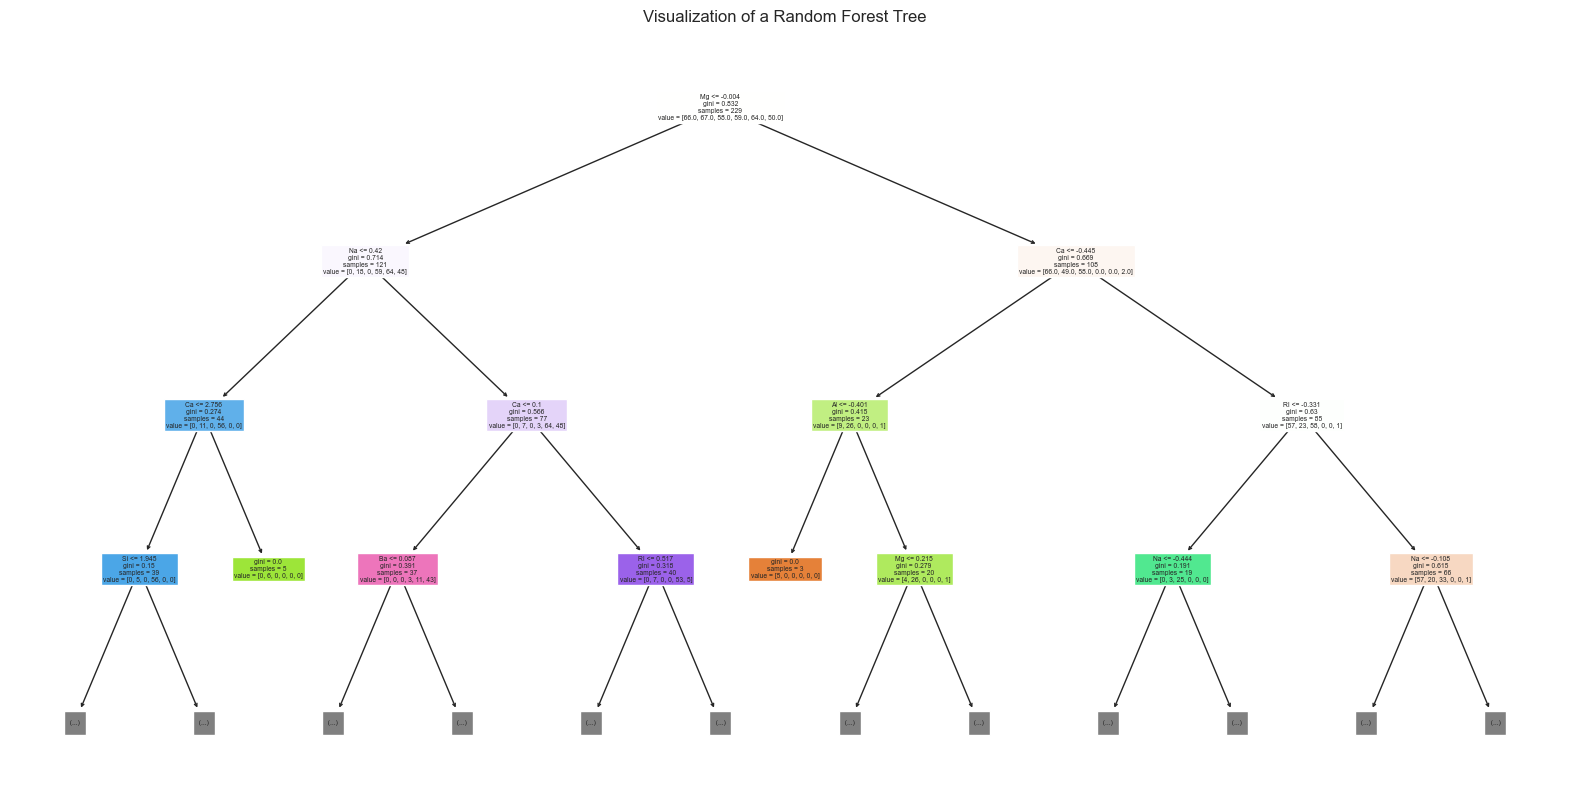

In [32]:
# Visualize one of the Random Forest trees
plt.figure(figsize=(20, 10))
tree.plot_tree(rf.estimators_[0], feature_names=df.columns[:-1], filled=True, max_depth=3)
plt.title("Visualization of a Random Forest Tree")
plt.show()

# --- Step 5: Bagging and Boosting Methods ---

In [34]:
# Bagging Classifier using the Random Forest model as the base estimator
bagging = BaggingClassifier(estimator=rf, n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)

In [35]:
# Evaluate the Bagging Classifier
print("\nBagging Classifier Performance:")
print("Classification Report:\n", classification_report(y_test, y_pred_bagging))


Bagging Classifier Performance:
Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.82      0.88        17
           2       0.90      0.95      0.92        19
           3       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      0.94      0.97        18

    accuracy                           0.95        92
   macro avg       0.94      0.95      0.95        92
weighted avg       0.95      0.95      0.95        92



In [36]:
# Boosting Classifier using AdaBoost
boosting = AdaBoostClassifier(n_estimators=50, random_state=42)
boosting.fit(X_train, y_train)
y_pred_boosting = boosting.predict(X_test)

In [37]:
# Evaluate the Boosting Classifier
print("\nBoosting Classifier Performance:")
print("Classification Report:\n", classification_report(y_test, y_pred_boosting))


Boosting Classifier Performance:
Classification Report:
               precision    recall  f1-score   support

           1       0.36      0.94      0.52        17
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00        10
           5       0.86      0.86      0.86        14
           6       0.00      0.00      0.00        14
           7       0.82      0.50      0.62        18

    accuracy                           0.40        92
   macro avg       0.34      0.38      0.33        92
weighted avg       0.36      0.40      0.35        92



# Bagging vs Boosting Explanation

In [39]:
print("\nExplanation of Bagging and Boosting:")
print("""
Bagging (Bootstrap Aggregating):
- Averages the predictions of multiple models to reduce variance and prevent overfitting.
- Individual models are trained independently on different subsets of the data (with replacement).
- Random Forest is an example of Bagging.

Boosting:
- Sequentially trains weak models to improve errors made by previous ones, thus reducing bias.
- Models are dependent, with each new model focusing on correcting the errors of the previous one.
- AdaBoost is a popular Boosting method.

Key Difference:
- Bagging reduces variance, while Boosting reduces bias.
""")


Explanation of Bagging and Boosting:

Bagging (Bootstrap Aggregating):
- Averages the predictions of multiple models to reduce variance and prevent overfitting.
- Individual models are trained independently on different subsets of the data (with replacement).
- Random Forest is an example of Bagging.

Boosting:
- Sequentially trains weak models to improve errors made by previous ones, thus reducing bias.
- Models are dependent, with each new model focusing on correcting the errors of the previous one.
- AdaBoost is a popular Boosting method.

Key Difference:
- Bagging reduces variance, while Boosting reduces bias.



# Handling Imbalanced Data Explanation

In [41]:
print("\nHandling Imbalanced Data:")
print("""
Imbalanced data can be addressed using:
1. Resampling techniques:
   - Oversampling (e.g., SMOTE): Generates synthetic samples for minority classes.
   - Undersampling: Removes samples from the majority class.
2. Algorithm-level solutions:
   - Modify algorithms to penalize misclassifications in minority classes.
3. Ensemble methods:
   - Techniques like Random Forest can inherently handle imbalances.
""")



Handling Imbalanced Data:

Imbalanced data can be addressed using:
1. Resampling techniques:
   - Oversampling (e.g., SMOTE): Generates synthetic samples for minority classes.
   - Undersampling: Removes samples from the majority class.
2. Algorithm-level solutions:
   - Modify algorithms to penalize misclassifications in minority classes.
3. Ensemble methods:
   - Techniques like Random Forest can inherently handle imbalances.

